In [59]:
import os 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
path = os.path.abspath('')
directory = path + '/experiments'
files = os.listdir(directory)
dic = {}
for file in files:
    filename = os.fsdecode(file)
    tmp_df = pd.read_csv(os.path.join(directory, filename), header=6)
    tmp_df['found-optimum'] = tmp_df['iterations'] != 500    
    dic[file] = tmp_df.drop(['trails-mode','path-to-load','highlight-mode','path-to-save','[run number]','[step]'],axis=1)

In [61]:
def group(tmp_df,on):
    '''
    replaces column iteration with average iterations
    average meaning the average iterations using one setting, only using results which found the optimum
    
    Sums up the number the optimum was found
    tmp_df = dataFrame to average
    on = column to average 
    '''
    join_df = tmp_df.copy()[tmp_df['found-optimum']].groupby(on).agg({'iterations': ['mean','std']})
    join_df.columns = join_df.columns.droplevel()
    final_df =  tmp_df.drop(['iterations'], axis=1).join(join_df,on=on).groupby(on).agg(
        {'mean': 'mean',
         'std': 'mean',
         'found-optimum' : 'sum'
        }).rename(columns = {'mean' : 'iterations_avg','std' : 'iterations_std'}).reset_index()
    runs = tmp_df.shape[0]/final_df.shape[0]
    final_df.loc[:,'found-optimum'] = final_df['found-optimum'] / runs
    
    return final_df

#### How many times did we find the optimum

personal-confidence


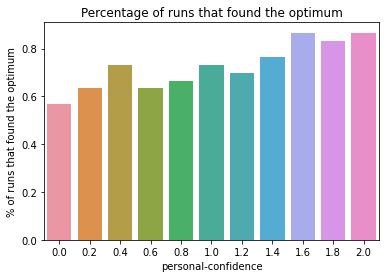

population-size


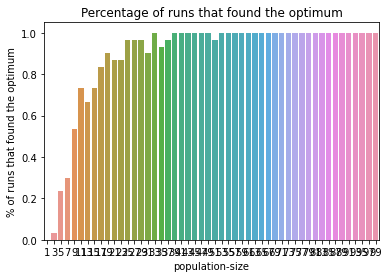

particle-speed-limit


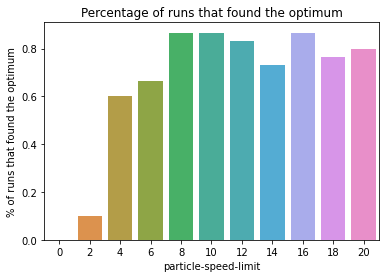

population-size


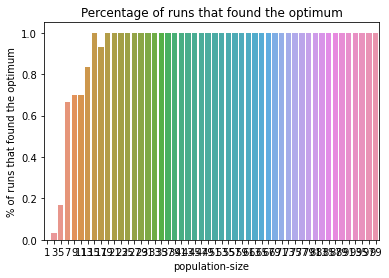

personal-confidence


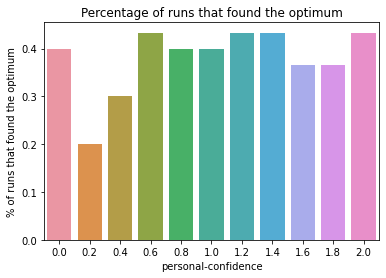

population-size


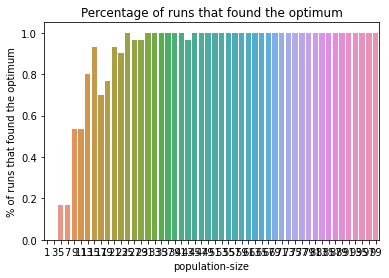

particle-speed-limit


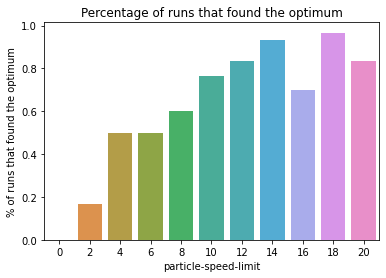

particle-speed-limit


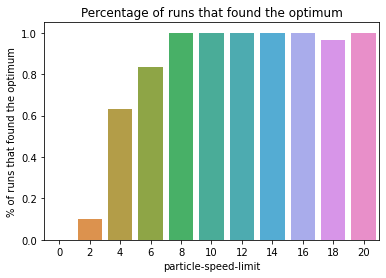

personal-confidence


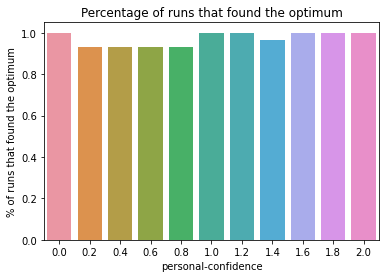

personal-confidence


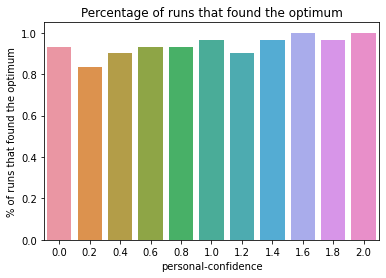

population-size


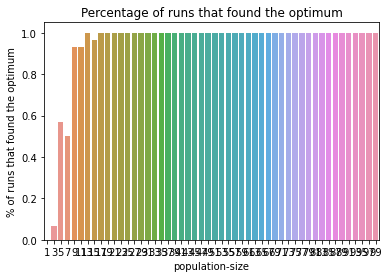

population-size


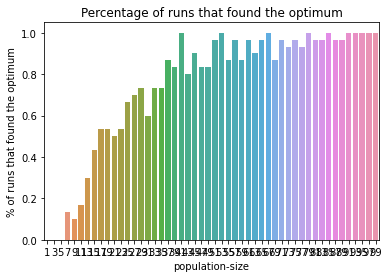

personal-confidence


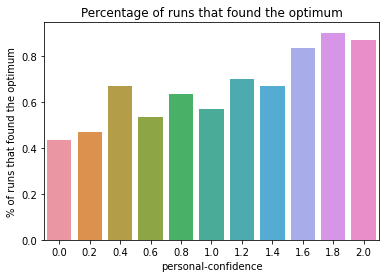

particle-speed-limit


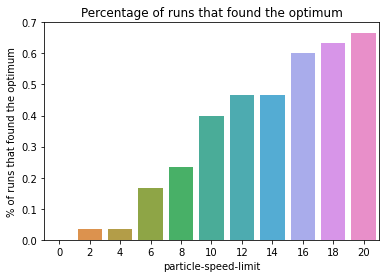

particle-inertia


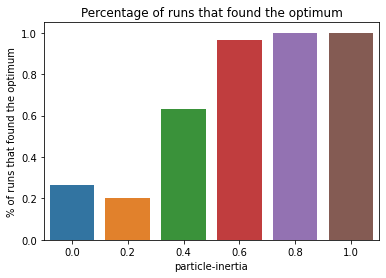

particle-speed-limit


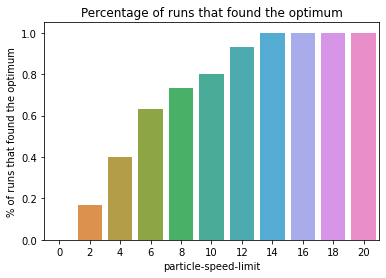

particle-inertia


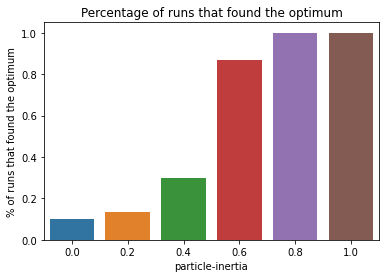

swarm-confidence


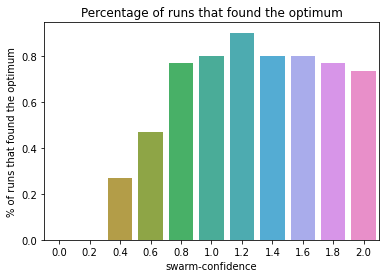

swarm-confidence


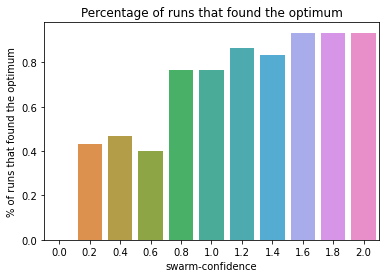

swarm-confidence


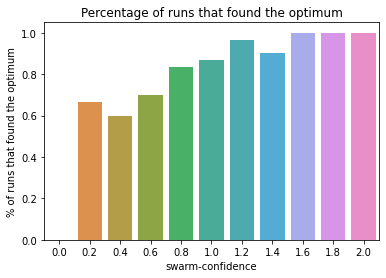

particle-inertia


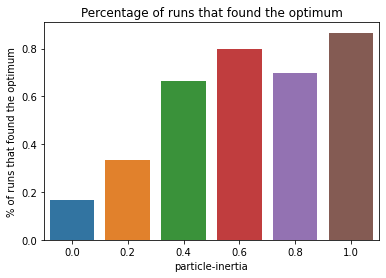

particle-inertia


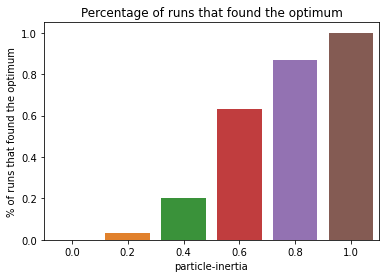

particle-inertia


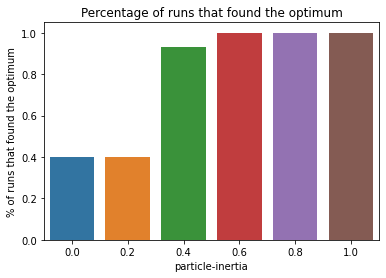

swarm-confidence


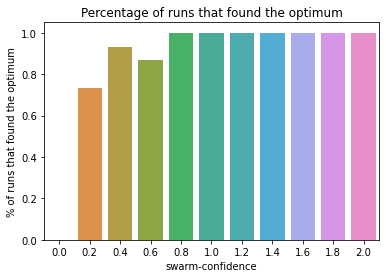

swarm-confidence


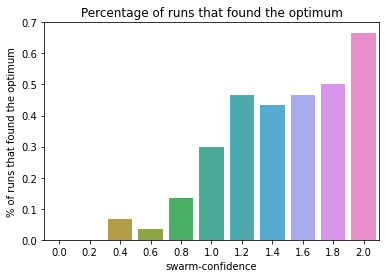

In [66]:
parameters = ['population_size', 'personal_confidence','swarm_confidence', 'particle_inertia', 'speed']

def print_optimum_plot(file, prm):
    if 'speed' in prm:
        prm = 'particle-speed-limit'
    parameter = prm.replace('_', '-')
    df = dic[file]
    df = group(df,on=parameter)
    print(parameter)
    sns.barplot(data=df,y='found-optimum',x=parameter)
    plt.title('Percentage of runs that found the optimum')
    plt.ylabel('% of runs that found the optimum')
    plt.show()

for file in files:
    for parameter in parameters:
        if parameter in file:
            print_optimum_plot(file, parameter)
            

#### Personal Confindence


In [ ]:
parameters = ['population_size', 'personal_confidence','swarm_confidence', 'particle_inertia', 'speed']

def print_avg_iterations_plot(file, prm):
    if 'speed' in prm:
        prm = 'particle-speed-limit'
    parameter = prm.replace('_', '-')
    df = dic[file]
    df = group(df,on=parameter)
    sns.barplot(data=df,y='iterations_avg',x=parameter)
    #for error bars add yerr=df['iterations_std'] in sns.barplot
    plt.title('Average iterations of all sucessfull runs')
    plt.ylabel('Average iterations needed')
    plt.show()

for file in files:
    for parameter in parameters:
        if parameter in file:
            print_avg_iterations_plot(file, parameter)